In [8]:
import pandas as pd

df = pd.read_csv("classification.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen willst
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln möchtest,
# kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [9]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["age", "interest"]].values

# oder : Die Spalte "succes" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

# Y-Werte können auch Buchstaben sein, dann funktioniert das Diagramm allerdings nicht
# deswegen kategorische Variablen in Spalten umwandeln
Y = df["success"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.88


/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


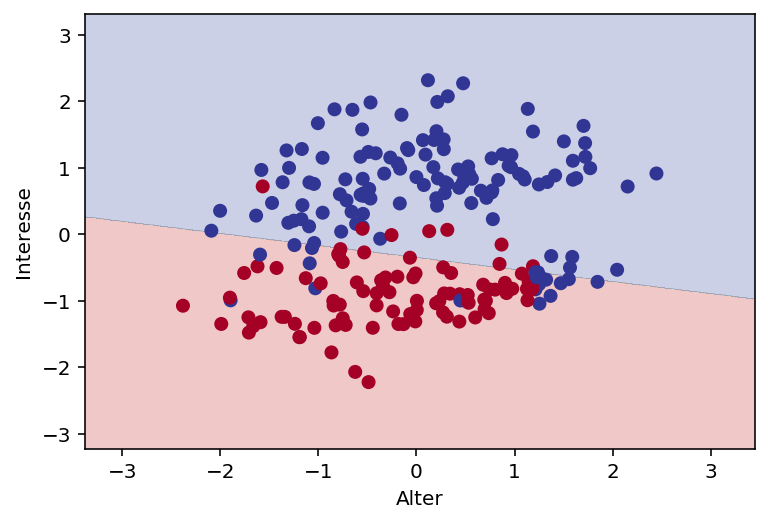

In [13]:
# Hinweis: Damit dieser Befehl funktioniert, muss die
# "helper.py" - Datei im selben Ordner liegen, wie das 
# aktuelle Jupyter Notebook

from helper import plot_classifier

# Trainingsdaten plotten

plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")

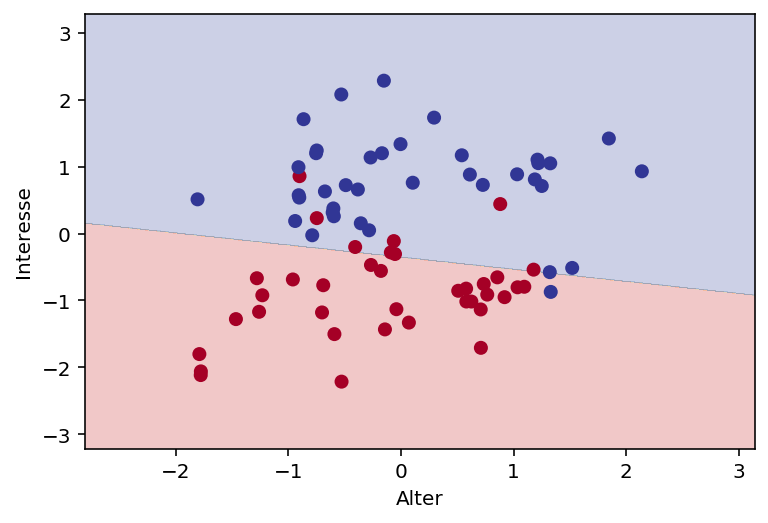

In [14]:
# Testdaten plotten

plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")